In [19]:
# Importing all the required modules

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Importing the data

df1=pd.read_csv('/Users/yashrajput/Desktop/RunCal/runningCaloriesBurnedPart-1.csv')
df2=pd.read_csv('/Users/yashrajput/Desktop/RunCal/runningCaloriesBurnedPart-2.csv')
df=pd.concat([df1,df2])
# df.info()

In [21]:
# Labeling the non-numerical values

label_encoder = LabelEncoder()
df['gender']=label_encoder.fit_transform(df['gender'])
df.head()

,calories_burned,weight,height,duration,speed,gender,age
0,543,65,170,60,5.5,0,32
1,854,75,180,75,6.2,1,41
2,325,55,160,45,4.8,2,28
3,621,70,165,60,5.0,0,35
4,943,80,185,90,6.5,1,50


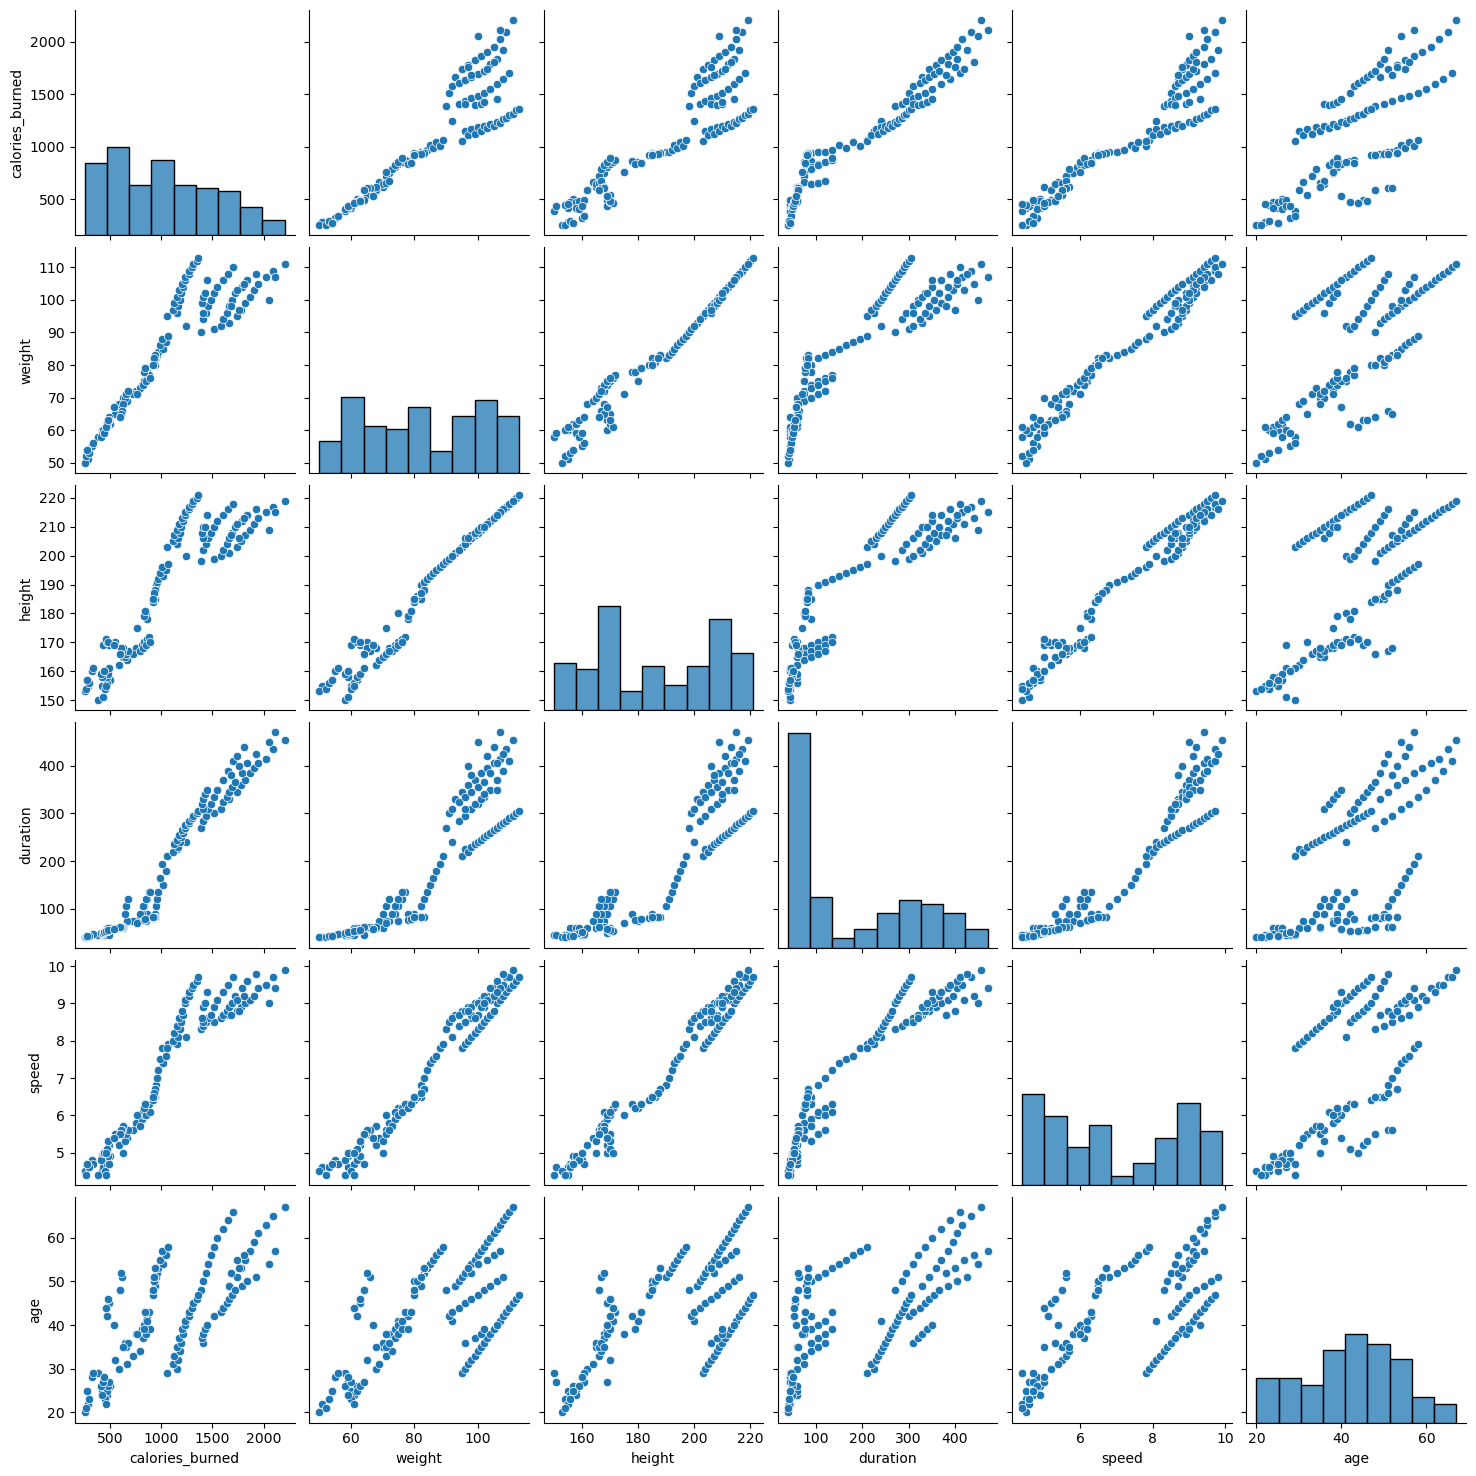

In [13]:
sns.pairplot(df)
plt.show()


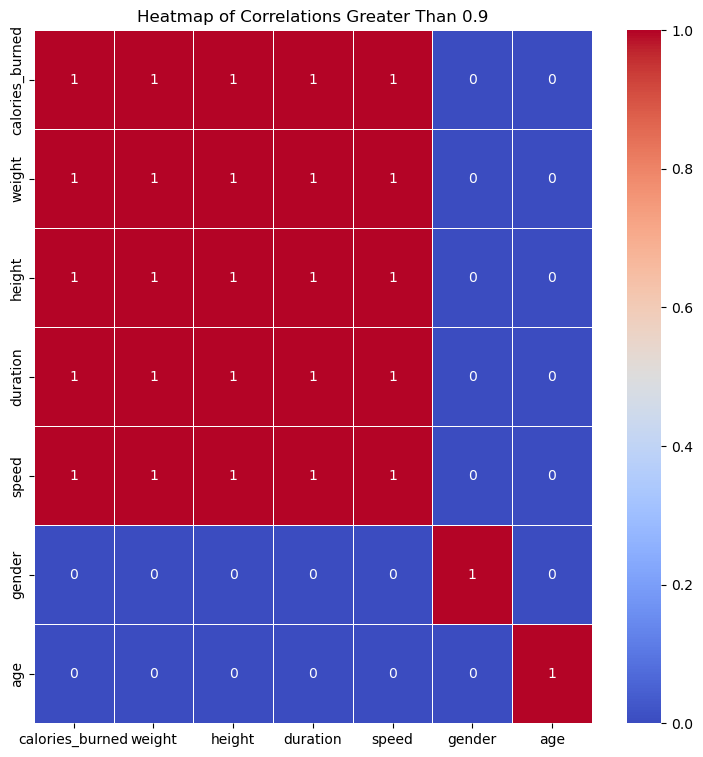

In [22]:
# # Ensure 'df' only includes numeric columns

# # Calculate the correlation matrix
corr_matrix = df.corr()

# Create a mask to highlight correlations above 0.9
mask = corr_matrix > 0.9

# Set up the matplotlib figure
plt.figure(figsize=(9, 9))

# Create the heatmap
sns.heatmap(mask,
            annot=True,   # Annotate the heatmap with the correlation coefficients
            cbar=True,   # Remove the color bar for cleaner visualization
            cmap='coolwarm',  # Color map for heatmap
            linewidths=0.5)  # Line width between cells

plt.title('Heatmap of Correlations Greater Than 0.9')
plt.show()

In [23]:
# Selecting only important features and splitting them into training and testing data

features = df.drop(['gender', 'calories_burned', 'age'], axis=1)
target = df['calories_burned'].values
X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.3,random_state=21)

In [24]:
# Normalizing the features for stable and fast training.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Training the model

best_model=RandomForestRegressor()
best_model.fit(X_train, y_train)
# val_preds = model.predict(X_test)
# print('Validation Error : ', mae(y_test, val_preds))

RandomForestRegressor()

In [27]:
# Testing if the model is working well for different set of attributes

new_data1 = np.array([[60, 165, 45, 6]])  # Example input 1
new_data2 = np.array([[74, 177, 60, 10]])  # Example input 2

new_data1 = scaler.transform(new_data1)
new_data2 = scaler.transform(new_data2)

print(f'Prediction for input 1: {best_model.predict(new_data1)[0]}')
print(f'Prediction for input 2: {best_model.predict(new_data2)[0]}')

Prediction for input 1: 509.69
Prediction for input 2: 857.42


In [28]:
# This code is used to check the importance of each feature 

if hasattr(best_model, 'feature_importances_'):
    print(best_model.feature_importances_)

[0.27139482 0.16682425 0.37493474 0.18684618]


In [29]:
# Dumping the model using pickle

with open('best_model.pkl', 'wb') as files:
    pickle.dump(best_model, files)
    print("Model has been saved to model.pkl")

Model has been saved to model.pkl


In [30]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
